<a href="https://colab.research.google.com/github/UznetDev/Data-science-home-work/blob/main/Another_copy_of_gd_for_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework : Intruduction to Logistic Regression

In this notebook you should develop the necessary methods and code for running gradient descent for logistic regression. The problem is to develop a model that receives two inputs and produces one output. The output should either be 1 or zero defining the class of the input.

Import the libraries: numpy and matplotlib.pyplot

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Given training data:

In [ ]:
X_tr = [ -83, -50, -50, 69, -67, 59, 67, 41, -38, -78, 49, 14, 87, -73, -22, 47, 99, -49, 98, 61, -84, -73, 75, -33, 30, -17, 58, -18, -91, 63, 61, -73, -87, 36, 79, 27, 18, -87, 62, 6 ]
Y_tr = [ 14, -9, -24, 21, -18, -48, 40, 47, 29, -34, 26, -4, 32, 22, -36, -19, -26, 29, 14, -15, -19, 18, 4, 33, 6, 43, -42, -31, 33, -21, 8, -34, -23, -40, 0, -18, -8, 34, 43, -11 ]
Z_tr = [ 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0 ]
X_tr = np.array(X_tr) # input 1
Y_tr = np.array(Y_tr) # input 2
Z_tr = np.array(Z_tr) # output

print(X_tr.shape, Y_tr.shape)

(40,) (40,)


And test data:

In [ ]:
X_test = [ -58, 80, 30, -34, 24, 55, 77, 54, 45, 42, 14, -74, 2, 72, -55, 90, -15, -37, 96, -8 ]
Y_test = [ 41, -13, -16, -43, -36, -19, -12, 24, 32, 2, 41, 15, -2, -10, -32, 5, -41, -15, -4, -50 ]
Z_test = [ 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0 ]

X_test = np.array(X_test) # input 1
Y_test = np.array(Y_test) # input 2
# Z_test = np.array(Z_test) # output

print(X_test.shape, Y_test.shape)

(20,) (20,)


Visualise the training dataset

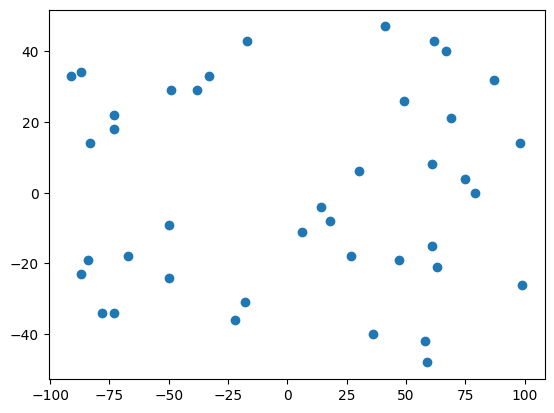

In [ ]:
plt.scatter(X_tr, Y_tr)

Define the model. Decide the form of the model and the number of parameters.

In [ ]:
# what are the inputs
def model(X, Y, w1, w2, b):
    z = 1 / (1 + np.exp(-(w1 * X + w2 * Y + b)))
    return z


Define the cross entropy loss:

$$L(z, \hat{z}) = - \frac{1}{N} \sum_{i=1}^{N} [z_i \cdot log(\hat{z_i}) + (1 - z_i) \cdot log(1 - \hat{z_i})]
$$

You don't need to do it yourself. Pay attention to the formula of the loss when calculating derivatives.

In [ ]:
def loss(predicted, expected):
    # Convert inputs to numpy arrays for easier manipulation
    predicted = np.array(predicted)
    expected = np.array(expected)

    # Avoid division by zero
    epsilon = 1e-8
    predicted = np.clip(predicted, epsilon, 1. - epsilon)

    # Calculate cross-entropy loss
    N = predicted.shape[0]
    ce_loss = -np.sum(expected * np.log(predicted + 1e-9) + (1 - expected) * np.log(1 - predicted + 1e-9)) / N
    return ce_loss

Define the train function that receives the data, epochs and the learning rate

In [ ]:
def train(X, Y, Z, epochs, lr):
    # Initialize parameters
    w1 = 1.0
    w2 = 1.0
    b = 0.0

    for i in range(epochs):
        # Forward pass
        z = model(X, Y, w1, w2, b)

        # Calculate gradients
        dw1 = np.mean((z - Z) * X)
        dw2 = np.mean((z - Z) * Y)
        db = np.mean(z - Z)

        # Update parameters
        w1 -= lr * dw1
        w2 -= lr * dw2
        b -= lr * db

        # Calculate the loss for logging
        L = loss(z, Z)

        if (i + 1) % 1000 == 0:
            # Print the logs
            print("Epoch:", i + 1, "Loss:", L)

    # Return the found parameters
    return w1, w2, b


Define the epochs, the learning rate and run the training.

In [ ]:
theta = np.random.rand(2)
beta = 0.9
epsilon = 1e-8
v = np.zeros_like(theta)
learning_rate = 0.001
epochs = 10000


parameters = train(X_tr, Y_tr, Z_tr, epochs, learning_rate)


Epoch: 1000 Loss: 0.0009557156865561814
Epoch: 2000 Loss: 0.0004543253259217714
Epoch: 3000 Loss: 0.0003122978429673202
Epoch: 4000 Loss: 0.00024579190432477623
Epoch: 5000 Loss: 0.00020741504149415923
Epoch: 6000 Loss: 0.00018251609214670235
Epoch: 7000 Loss: 0.00016509011232940948
Epoch: 8000 Loss: 0.00015222583151414066
Epoch: 9000 Loss: 0.00014234327379561985
Epoch: 10000 Loss: 0.00013451219061286725


# See the results for the test set

In [ ]:
w1, w2, b = parameters

z_pred = model(X_test, Y_test, w1, w2, b)

accuracy = np.mean(((z_pred > 0.5).astype(int) == Z_test))
print("Accuracy on the test set: {:.2f}%".format(accuracy * 100))


Accuracy on the test set: 95.00%


# Logistic regression with Kaggle dataset


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
data = pd.read_csv('framingham.csv')
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
df_cleaned = data.dropna()

In [ ]:
X = df_cleaned[['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
                 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
                 'diaBP', 'BMI', 'heartRate', 'glucose']]
y = df_cleaned['TenYearCHD']  # target variable


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
model = LogisticRegression()
model

LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


In [ ]:
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.8361
Confusion Matrix:
[[602   8]
 [112  10]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       610
           1       0.56      0.08      0.14       122

    accuracy                           0.84       732
   macro avg       0.70      0.53      0.53       732
weighted avg       0.80      0.84      0.78       732

